<a href="https://colab.research.google.com/github/tmquan11032003/Machine_Learning/blob/main/FMCGStore_Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data manipulation
import numpy as np
import pandas as pd
from scipy.stats import (chi2_contingency, randint,
                         expon, gamma, uniform, loguniform)
from scipy.cluster.hierarchy import dendrogram #Clustering
import scipy.cluster.hierarchy as shc #Clustering

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

# data processing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder,
                                   MinMaxScaler, StandardScaler,
                                   LabelEncoder)
from sklearn.compose import ColumnTransformer

# imblanced dataset
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours, RandomUnderSampler
from imblearn.combine import SMOTEENN

# binary classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize #Clustering

# modelling
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier,ExtraTreesClassifier)
from sklearn.tree import (DecisionTreeClassifier, ExtraTreeClassifier)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans #Clustering


# Principal component ânlysis
from sklearn.decomposition import PCA #Clustering


# display images
import graphviz

# metrics
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, recall_score, precision_score, f1_score, accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import silhouette_score #Clustering
#Debug lỗi không import được xgboost
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier #!pip install xgboost

In [ ]:
file_url = 'https://drive.google.com/file/d/1cRNvH7NAdSxIDA5g5uKjtXMEJZ08F1NX/view'
file_id = file_url.split('/')[-2]
url = 'https://drive.google.com/uc?id=' + file_id

print(file_id)
print(url)

df = pd.read_csv(url)

1cRNvH7NAdSxIDA5g5uKjtXMEJZ08F1NX
https://drive.google.com/uc?id=1cRNvH7NAdSxIDA5g5uKjtXMEJZ08F1NX


# A. Data Dictionary

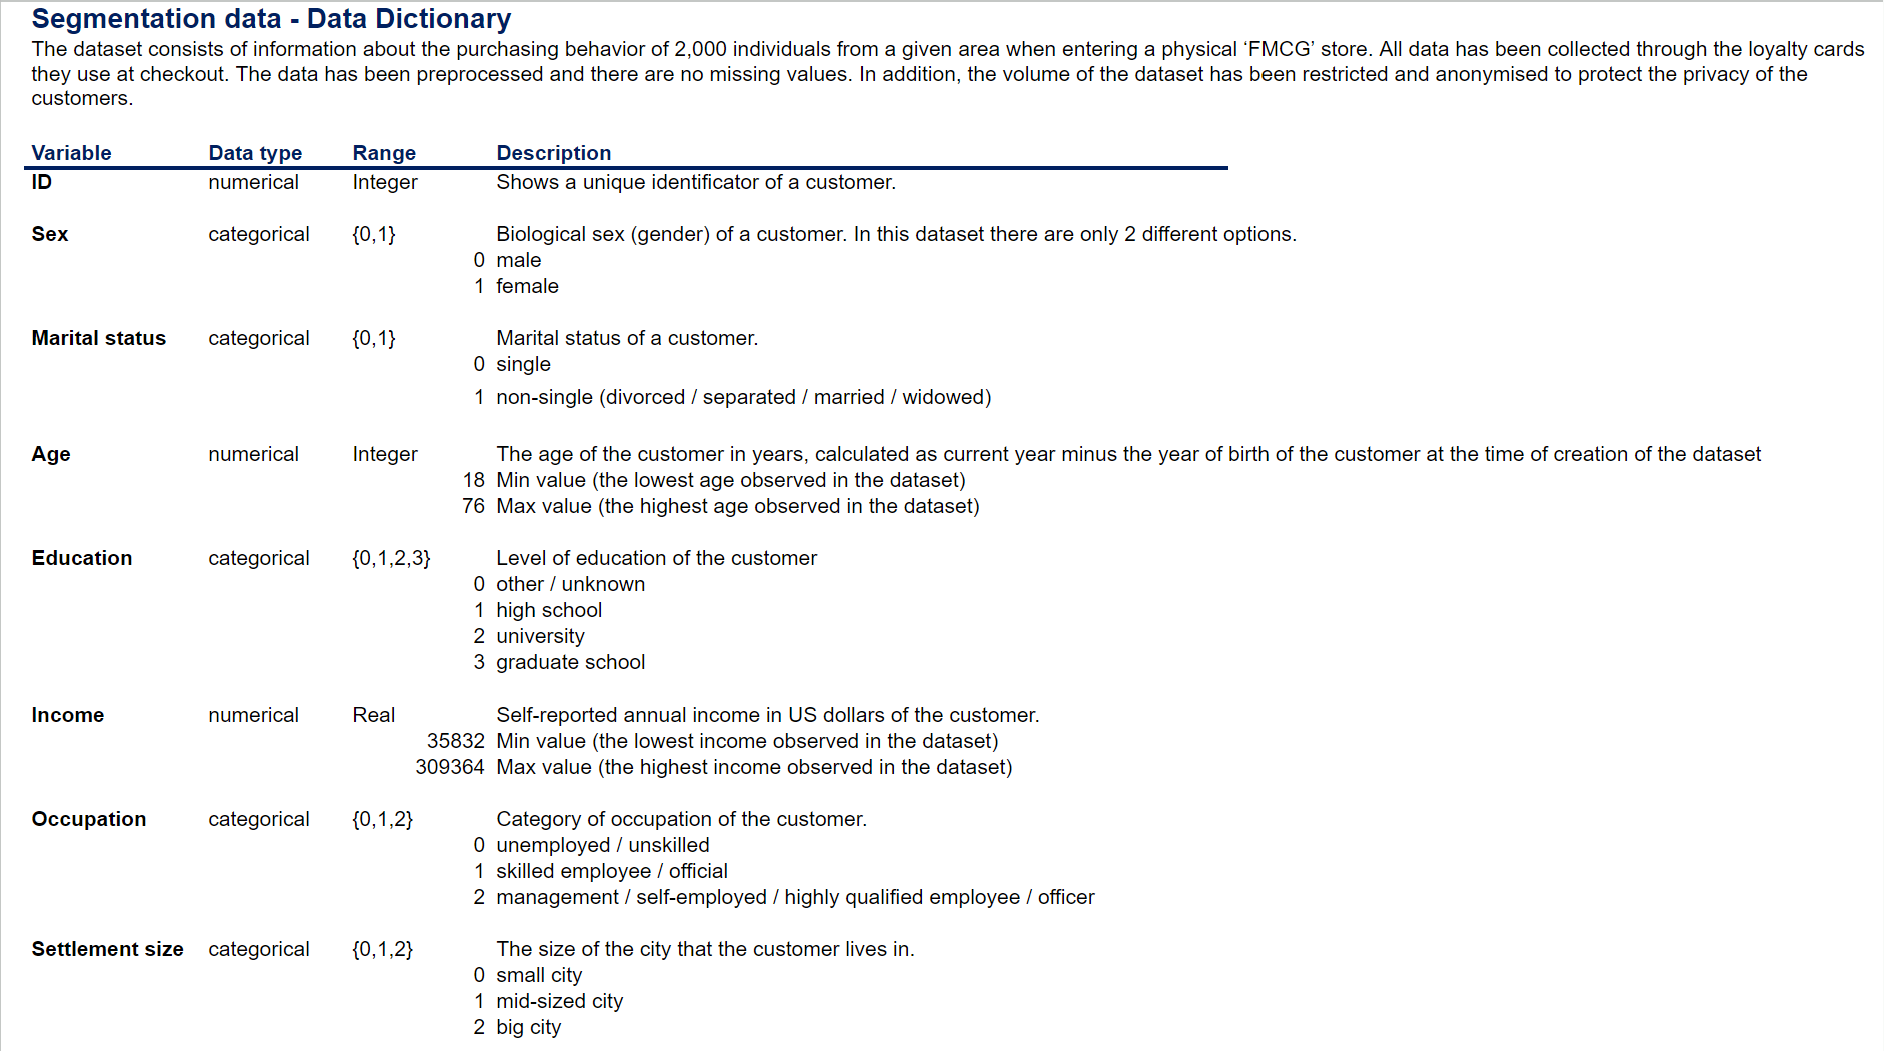

# B. Preview Data

In [ ]:
df = df.reset_index(drop = True).set_index(df.index + 1)

In [ ]:
df.drop(columns = 'ID',inplace = True)

In [ ]:
df.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1,0,0,67,2,124670,1,2
2,1,1,22,1,150773,1,2
3,0,0,49,1,89210,0,0


In [ ]:
df.tail(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1998,0,0,31,0,86400,0,0
1999,1,1,24,1,97968,0,0
2000,0,0,25,0,68416,0,0


In [ ]:
df.sample(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
714,0,0,25,0,60868,0,0
1933,0,1,35,1,112975,1,0
1308,1,1,19,1,99119,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 1 to 2000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Sex              2000 non-null   category
 1   Marital status   2000 non-null   category
 2   Age              2000 non-null   int64   
 3   Education        2000 non-null   category
 4   Income           2000 non-null   int64   
 5   Occupation       2000 non-null   category
 6   Settlement size  2000 non-null   category
dtypes: category(5), int64(2)
memory usage: 41.8 KB


In [ ]:
#Convert Columns to categorycal
cat_cols = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']
def convert_cat(df, cat_cols):
  for cat_col in cat_cols:
    df[cat_col] = df[cat_col].astype('category')
convert_cat(df, cat_cols)

In [ ]:
# data distribution
print('Numeric')
display(df.describe())  # numerical data

print('Categorical')
display(df.describe(exclude = [int, float]))  # categorical data

Numeric


,Age,Income
count,2000.000000,2000.000000
mean,35.909000,120954.419000
std,11.719402,38108.824679
min,18.000000,35832.000000
25%,27.000000,97663.250000
50%,33.000000,115548.500000
75%,42.000000,138072.250000
max,76.000000,309364.000000


Categorical


,Sex,Marital status,Education,Occupation,Settlement size
count,2000,2000,2000,2000,2000
unique,2,2,4,3,3
top,0,0,1,1,0
freq,1086,1007,1386,1113,989


# 1. Exploratory Data Analysis (EDA)

In [ ]:
# Set new style for the graph
plt.style.use("default")

<ipython-input-6-3cd339c99e47>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age']);


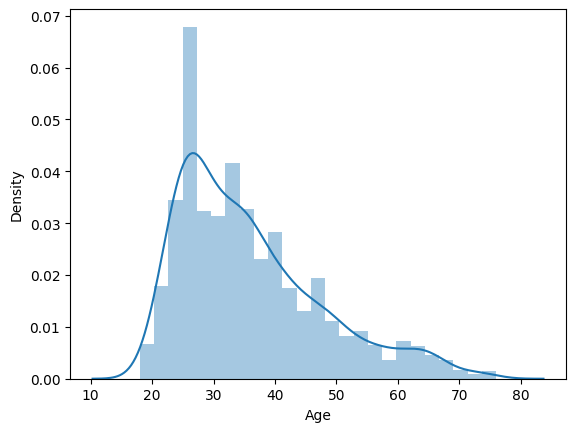

In [ ]:
sns.distplot(df['Age']);

<ipython-input-13-026561f384e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income']);


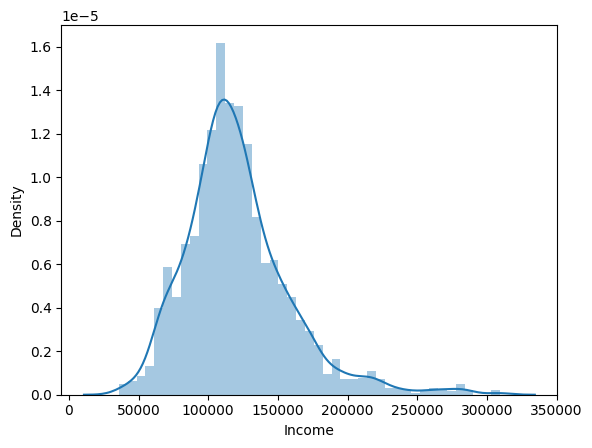

In [ ]:
sns.distplot(df['Income']);

# 2. Data Wrangling

In [ ]:
scaler = MinMaxScaler()
scale_df = scaler.fit_transform(df)
df = pd.DataFrame(data=scale_df, columns=df.columns, index=df.index)

In [ ]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1,0,0,67,2,124670,1,2
2,1,1,22,1,150773,1,2
3,0,0,49,1,89210,0,0
4,0,0,45,1,171565,1,1
5,0,0,53,1,149031,1,1


In [ ]:
# #Scale
# Numerical_cols = df.select_dtypes(include=['int']) #Choose numerical data
# scaler = MinMaxScaler() #Scale by MinMaxScaler
# df[Numerical_cols.columns] = scaler.fit_transform(df[Numerical_cols.columns])


In [ ]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
2,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
3,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
4,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
5,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5


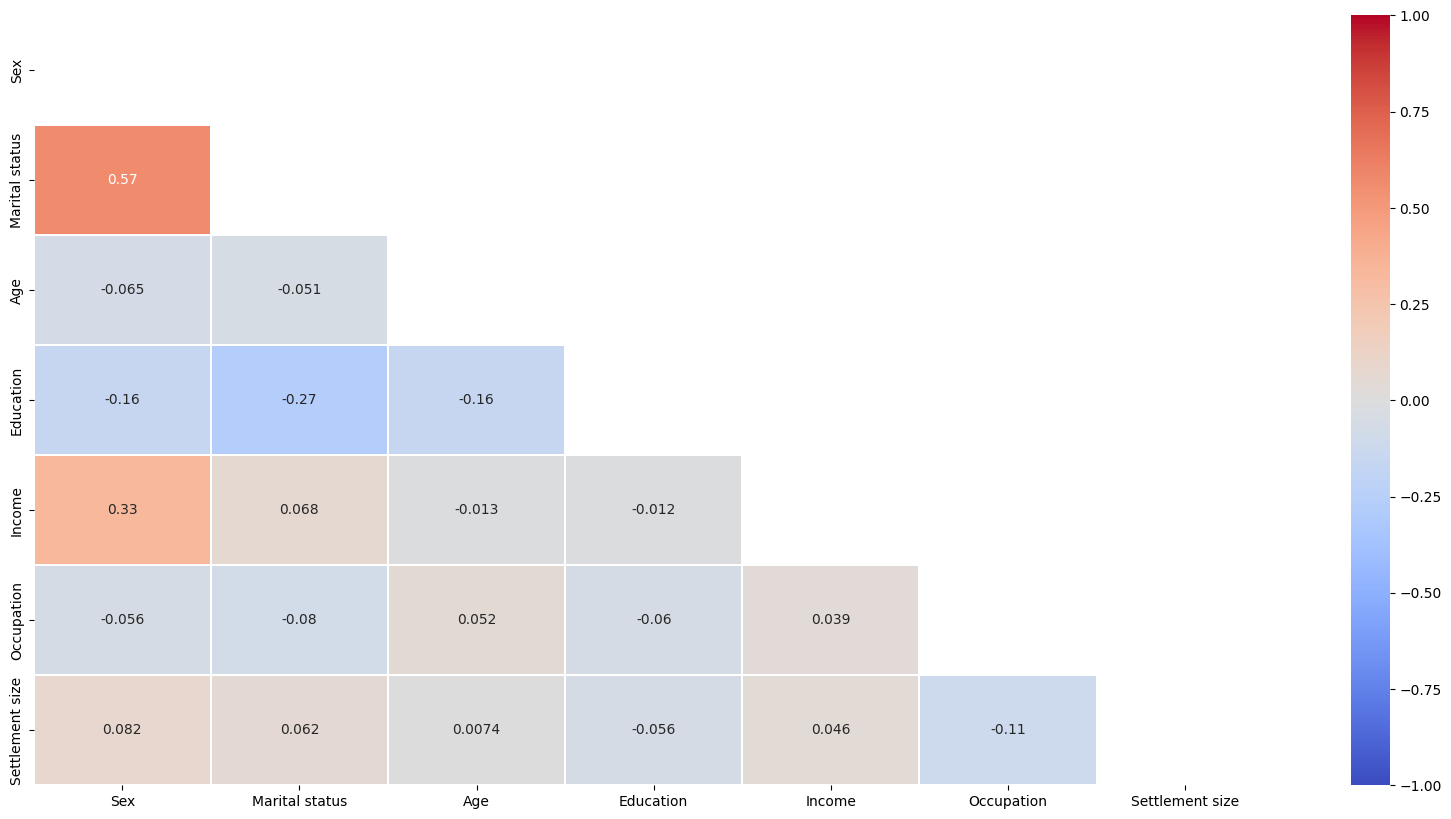

In [ ]:
#Vẽ hình ma trận tương quan (correlation matrix) để xem tương quan giữa các biến
plt.figure(figsize=(20, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# 3. Pricipal component analysis

In [ ]:
#https://www.youtube.com/watch?v=DYuI4PCzOyw
# Principal component analysis
from sklearn.decomposition import PCA #Clustering
pca = PCA()
X_pca = pca.fit_transform(df)

In [ ]:
X_pca

array([[ 0.82608574,  0.35465199,  0.15842246, ...,  0.4013863 ,
        -0.11468204, -0.0744669 ],
       [-0.52489089,  0.71629295,  0.24094749, ...,  0.23707811,
         0.07786503,  0.07745403],
       [ 0.48600855, -0.69066765, -0.18159388, ...,  0.14844254,
        -0.00284692, -0.07204236],
       ...,
       [ 0.49489934, -0.74607966, -0.18980786, ...,  0.04717541,
         0.06151282, -0.08825685],
       [-0.87582808, -0.28527325, -0.09425626, ...,  0.1033185 ,
         0.06105239,  0.05293938],
       [ 0.48311506, -0.76156545, -0.20073456, ...,  0.04154378,
        -0.0071562 , -0.03625231]])

In [ ]:
# how much info we reteained from the dataset
pca.explained_variance_ratio_.cumsum()[1]

0.7314791216588474

# 4. Unsupervised Learnung

## a. Silhouette coefficients

In [ ]:
si = []
for k in range(2, 11,1):
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(df)
 score = silhouette_score(df, kmeans.labels_)
 si.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
si

[0.38549477975610286,
 0.3569135304337949,
 0.4023684317095256,
 0.4224716320686519,
 0.4373042442245209,
 0.4440004856023553,
 0.4392840737402153,
 0.40077180187012446,
 0.4291229467420205]

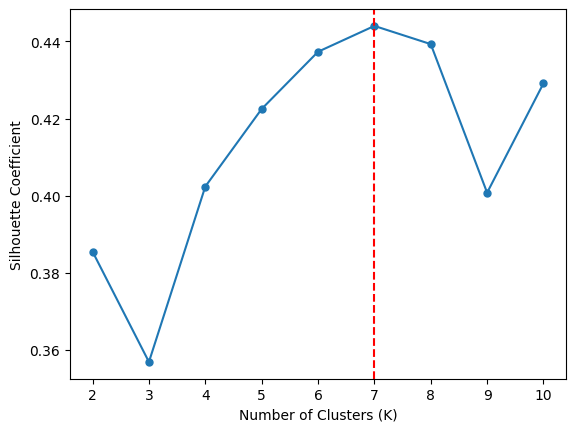

In [ ]:
#Trực quan hoá Silhoutte coefficients
plt.plot(range(2, 11), si,'.-',markersize=10)
plt.xticks(range(2, 11))
plt.axvline(x=7, color='r', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Coefficient")
plt.show()

## b. Elbow


In [ ]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_/1000)

In [ ]:
wcss

[1.0278897512780298,
 0.8067279647911286,
 0.6274824486201519,
 0.5139660320259306,
 0.4047656717187893,
 0.36311814001662934,
 0.3304096640529633,
 0.308528768157078,
 0.27613899826498356]

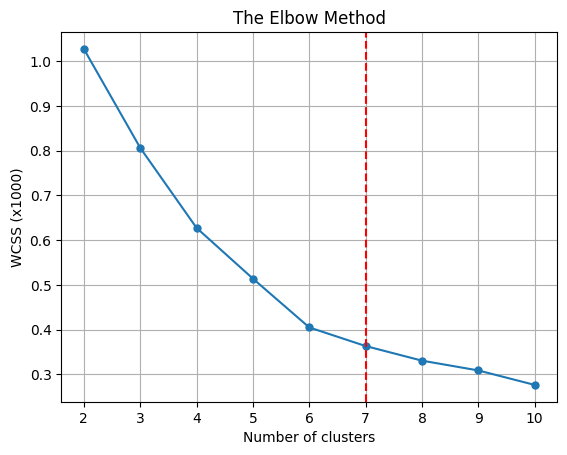

In [ ]:
#Trực quan hoá Elbow
plt.plot(range(2, 11), wcss,'.-',markersize=10)
plt.xticks(range(2, 11))
plt.axvline(x=7, color='r', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (x1000)')
plt.grid(linestyle='-')
plt.show()

Kết hợp giữa 2 kết quả trên ta có k = 7 sẽ tối ưu mô hình nhất


# 4. K - Means Clustering

In [ ]:
#Gán biến cho model và train
kmeans = KMeans(n_clusters=7, n_init='auto')
y_pred = kmeans.fit_predict(df)

In [ ]:
# kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [ ]:
#Add thêm cột class vào bảng data
df['Cluster']=y_pred

In [ ]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
1,0,0,67,2,124670,1,2,6
2,1,1,22,1,150773,1,2,1
3,0,0,49,1,89210,0,0,0
4,0,0,45,1,171565,1,1,1
5,0,0,53,1,149031,1,1,1


In [ ]:
df['Cluster'].value_counts().to_frame().sort_index()

,Cluster
0,368
1,276
2,27
3,85
4,218
5,543
6,483


<Axes: xlabel='Cluster', ylabel='count'>

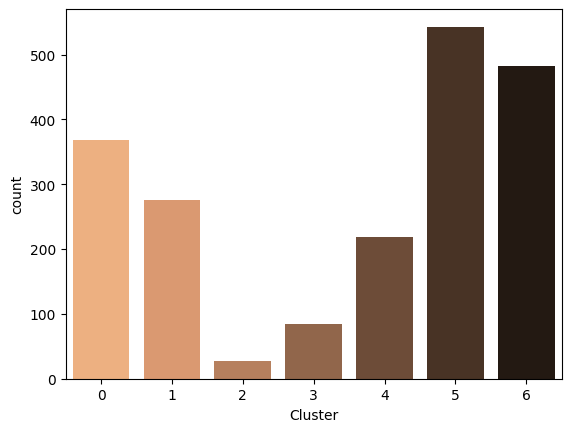

In [ ]:
sns.countplot(data=df, x='Cluster', palette='copper_r')

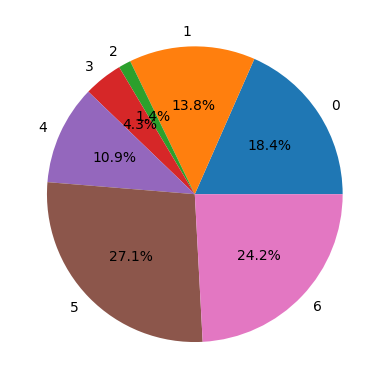

In [ ]:
 #Phần trăm số lượng của các Cluster
plt.pie(df['Cluster'].value_counts().sort_index(), autopct='%1.1f%%', labels=['0', '1','2', '3','4','5','6'])
plt.show()

<Axes: xlabel='Cluster', ylabel='Income'>

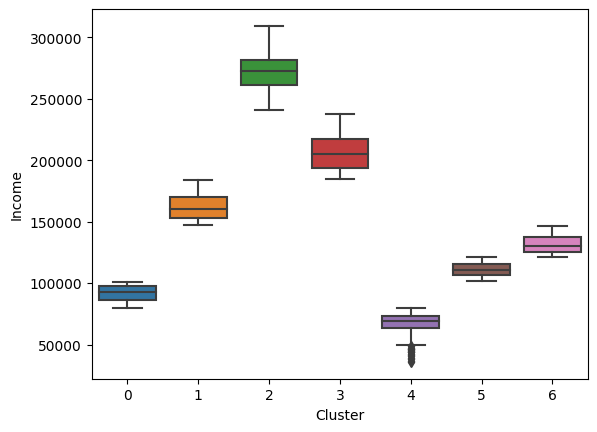

In [ ]:
sns.boxplot(y = df.Income, x = df.Cluster)

Vậy Income là 1 feature tốt để phân lớp

<Axes: xlabel='Cluster', ylabel='Age'>

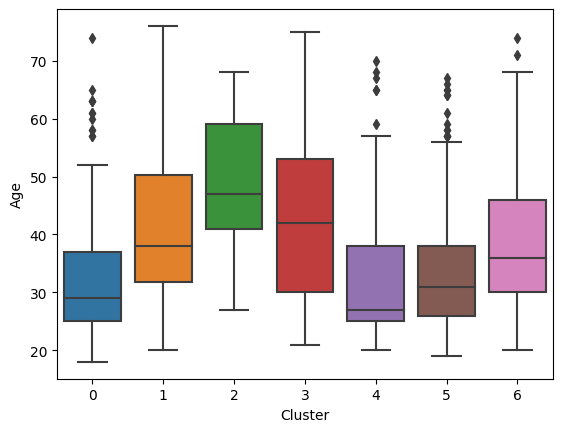

In [ ]:
sns.boxplot(y = df.Age, x = df.Cluster)